In [ ]:
# install tweepy library
!pip install git+https://github.com/tweepy/tweepy.git

  Cloning https://github.com/tweepy/tweepy.git to /tmp/pip-req-build-ubd6nccz
  Running command git clone -q https://github.com/tweepy/tweepy.git /tmp/pip-req-build-ubd6nccz
  Created wheel for tweepy: filename=tweepy-4.4.0-py2.py3-none-any.whl size=65575 sha256=d4f321170e7fe8346db3f5eb4085e42104640bbeb6598e050087fbf421f46ac4
  Stored in directory: /tmp/pip-ephem-wheel-cache-shnecjal/wheels/b4/a5/5a/5074abdb9f4bd5bd0e22631a63fc41ae2fa71ad83780ea18d1
Successfully built tweepy
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0


In [ ]:
# Python 3.7.12
import csv
import tweepy   # tweepy-4.4.0

import pandas as pd # 1.1.5
import numpy as np  # 1.19.5

import matplotlib.pyplot as plt # 3.2.2

import datetime
from datetime import datetime

import networkx as nx # 2.6.3
from community import community_louvain

# 1 Task 1 – Data Gathering, Pre-processing and EDA

In [ ]:
# store the name into list which we want to get the data from
name_list = ["elonmusk", "SpaceX", "engineers_feed"]

Twitter API V1.1:

In [ ]:
# twitter API
consumer_key = ""
consumer_secret = ""

access_key = ""
access_secret = ""

bearer_token = ""

In [ ]:
# Twitter API v1.1 Interface
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

Twitter API V2:

In [ ]:
client = tweepy.Client(bearer_token=bearer_token, consumer_key=consumer_key, consumer_secret=consumer_secret, access_token=access_key, access_token_secret=access_secret)

Define a fucntion that can get the id of the user when we give his/her screen name.

In [ ]:
def get_user_id(screen_name):
  # fetching the user
  user = api.get_user(screen_name=screen_name)
  
  # fetching the ID
  ID = user.id_str

  return ID

Define a function that can get 100 tweets from the screen name of users we select.

In [ ]:
def get_100_tweets(screen_name):
    
    # initialize a list to hold all Tweets
    tweets = []  
    
    # get most recent statuses posted from the authenticating user, can change number by "count"
    new_tweets = api.user_timeline(screen_name = screen_name,count=100)
    
    # save tweets
    tweets.extend(new_tweets)
    
    # The tweets are converted into a two-dimensional array, which is used to fill the CSV.
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text] for tweet in tweets]
    
    # write the csv  
    with open(f'{screen_name}_tweets.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerow(["id","created_at","text"])
        writer.writerows(outtweets)
    
    pass

In [ ]:
# get 100 tweets from 3 users
for name in name_list:
  
  get_100_tweets(name)

# create a empty dataframe to store the data
tweets_dataframe = pd.DataFrame([])

for name in name_list:
  # read the csv file and turn into dataframe
  temp = pd.read_csv('/content/' + name + "_tweets.csv")

  # Add a column and assign the name to the column
  temp.loc[:, 'name_of_user'] = name

  # concatenate dataframe
  tweets_dataframe = pd.concat([tweets_dataframe, temp], axis=0)

In [ ]:
tweets_dataframe

,id,created_at,text,name_of_user
0,1473824879820615680,2021-12-23 01:16:48+00:00,The @SkepticsGuide book is 👍,elonmusk
1,1473814525774336006,2021-12-23 00:35:39+00:00,Lots of Tesla cars to deliver before year end!...,elonmusk
2,1473804628403834886,2021-12-22 23:56:20+00:00,"@scottwww @realrobcopeland Yeah, I didn’t have...",elonmusk
3,1473794952719224836,2021-12-22 23:17:53+00:00,Whereas radar has trouble seeing small pedestr...,elonmusk
4,1473793631354040322,2021-12-22 23:12:38+00:00,@nurodev Disney restricted us to US only,elonmusk
...,...,...,...,...
95,1470346913937604610,2021-12-13 10:56:36+00:00,Today is the birthday of Ernst Werner Siemens ...,engineers_feed
96,1470257173833859076,2021-12-13 05:00:00+00:00,Programmers office safety board:\n\nDays since...,engineers_feed
97,1470151481013813258,2021-12-12 22:00:01+00:00,App: Rate us!\nMe: Never ask again!\nApp: http...,engineers_feed
98,1470108714782842880,2021-12-12 19:10:05+00:00,World of Engineering Quiz:\n\n50÷5(5-3)+5÷1/5=?,engineers_feed


After we get the data, the next step before EDA is data cleaning

<font size="5" >**Reset the index of the DataFrame**</font>

In [ ]:
tweets_dataframe = tweets_dataframe.reset_index().drop('index', axis = 1)
tweets_dataframe

,id,created_at,text,name_of_user
0,1473824879820615680,2021-12-23 01:16:48+00:00,The @SkepticsGuide book is 👍,elonmusk
1,1473814525774336006,2021-12-23 00:35:39+00:00,Lots of Tesla cars to deliver before year end!...,elonmusk
2,1473804628403834886,2021-12-22 23:56:20+00:00,"@scottwww @realrobcopeland Yeah, I didn’t have...",elonmusk
3,1473794952719224836,2021-12-22 23:17:53+00:00,Whereas radar has trouble seeing small pedestr...,elonmusk
4,1473793631354040322,2021-12-22 23:12:38+00:00,@nurodev Disney restricted us to US only,elonmusk
...,...,...,...,...
216,1470346913937604610,2021-12-13 10:56:36+00:00,Today is the birthday of Ernst Werner Siemens ...,engineers_feed
217,1470257173833859076,2021-12-13 05:00:00+00:00,Programmers office safety board:\n\nDays since...,engineers_feed
218,1470151481013813258,2021-12-12 22:00:01+00:00,App: Rate us!\nMe: Never ask again!\nApp: http...,engineers_feed
219,1470108714782842880,2021-12-12 19:10:05+00:00,World of Engineering Quiz:\n\n50÷5(5-3)+5÷1/5=?,engineers_feed


<font size="5" >**Missing Values**</font>

In [ ]:
tweets_dataframe.isnull().sum()

id              0
created_at      0
text            0
name_of_user    0
dtype: int64

As we can see, our Dataframe does not contain any missing values

<font size="5" >**Handling Outliers**</font>

In [ ]:
time = []

for x in tweets_dataframe['created_at']:
  datetime_object = datetime.strptime(x, "%Y-%m-%d %H:%M:%S+00:00")
  time.append(datetime_object)

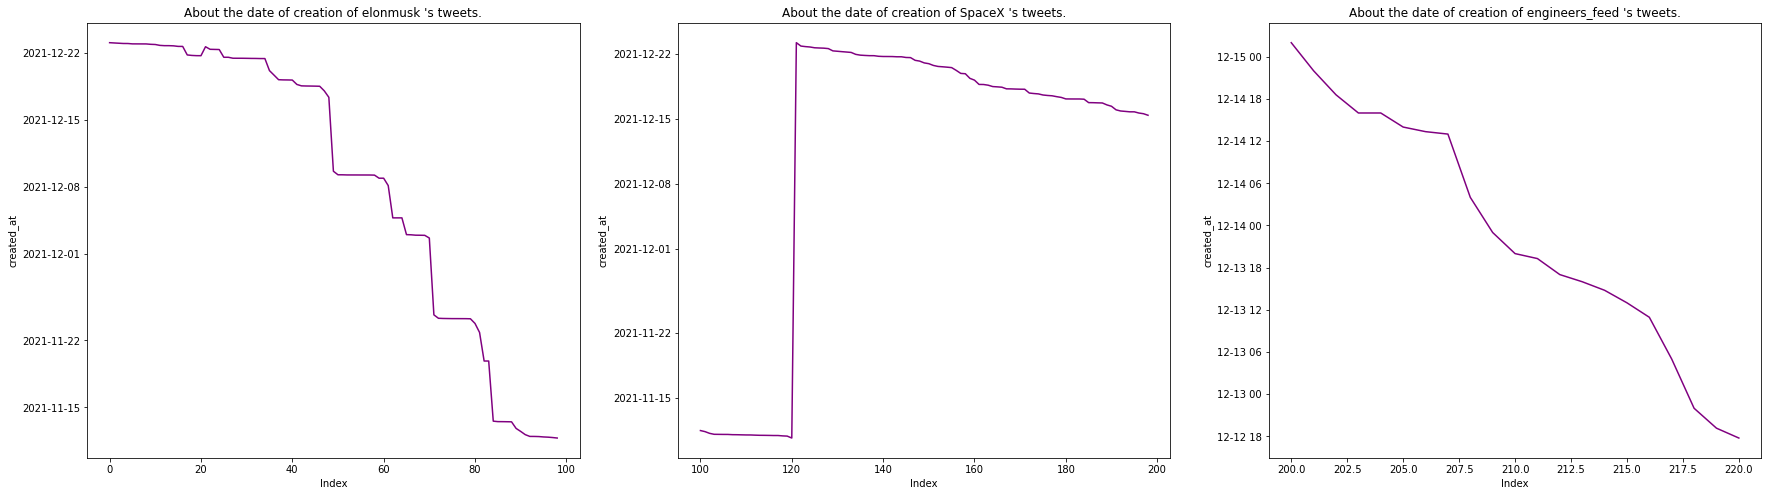

In [ ]:
# Create figure and plot space
# ax1, ax2, ax3 represent different images of each of the 3 individuals.
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 8))

#######################################################################
# Add x-axis and y-axis for figure 1
ax1.plot(tweets_dataframe[0:99].index.values,
        time[0:99],
        color='purple')

# Set title and labels for axes
ax1.set(xlabel="Index",
       ylabel="created_at",
       title="About the date of creation of elonmusk 's tweets.")

#######################################################################
# Add x-axis and y-axis for figure 1
ax2.plot(tweets_dataframe.index.values[100:199],
        time[100:199],
        color='purple')

# Set title and labels for axes
ax2.set(xlabel="Index",
       ylabel="created_at",
       title="About the date of creation of SpaceX 's tweets.")

#######################################################################
# Add x-axis and y-axis for figure 1
ax3.plot(tweets_dataframe[200:299].index.values,
        time[200:299],
        color='purple')

# Set title and labels for axes
ax3.set(xlabel="Index",
       ylabel="created_at",
       title="About the date of creation of engineers_feed 's tweets.")

plt.show()

As we can see, it seems like there has no outliers.

<font size="5" >**Bivariate Analysis**</font>

In [ ]:
# create a empty list to store the day of create tweet
day = []

# get the data from datatime object
for x in time:
    day.append(x.day)

In [ ]:
# insert the column to the old dataframe
tweets_dataframe.insert(2, "day_of_create", day)

In [ ]:
tweets_dataframe.head()

,id,created_at,day_of_create,text,name_of_user
0,1473824879820615680,2021-12-23 01:16:48+00:00,23,The @SkepticsGuide book is 👍,elonmusk
1,1473814525774336006,2021-12-23 00:35:39+00:00,23,Lots of Tesla cars to deliver before year end!...,elonmusk
2,1473804628403834886,2021-12-22 23:56:20+00:00,22,"@scottwww @realrobcopeland Yeah, I didn’t have...",elonmusk
3,1473794952719224836,2021-12-22 23:17:53+00:00,22,Whereas radar has trouble seeing small pedestr...,elonmusk
4,1473793631354040322,2021-12-22 23:12:38+00:00,22,@nurodev Disney restricted us to US only,elonmusk


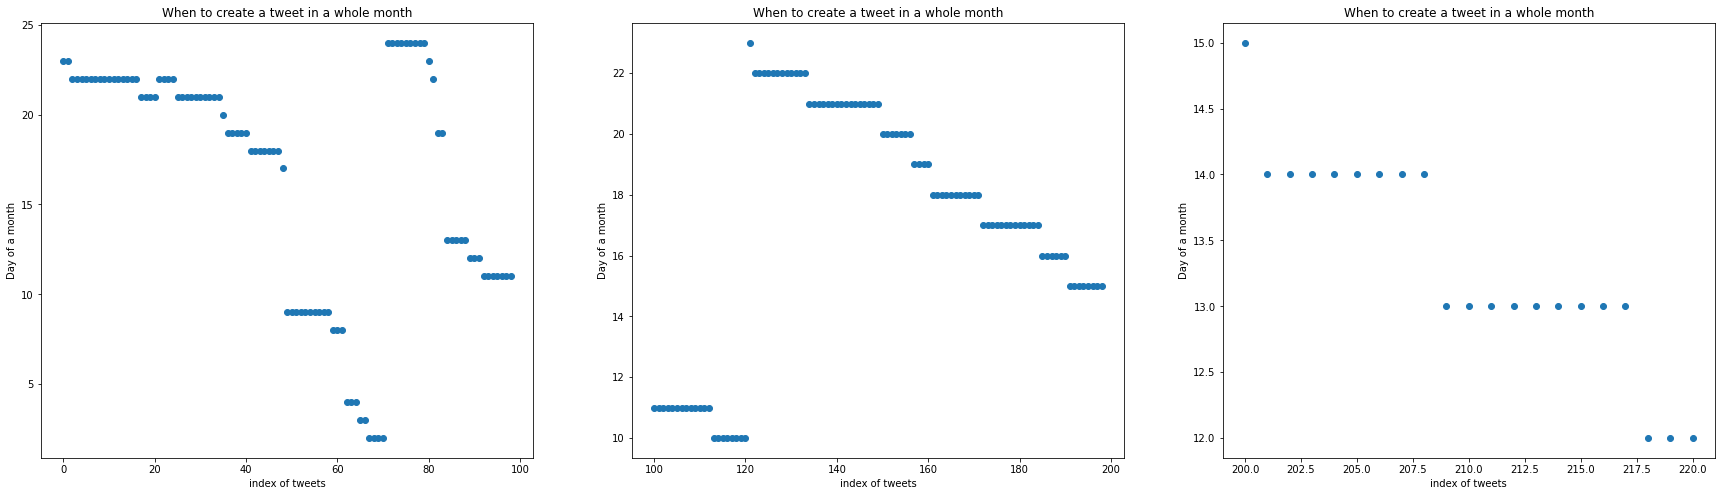

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 8))

#######################################################################
ax1.scatter(tweets_dataframe[0:99].index.values,
        tweets_dataframe['day_of_create'][0:99])
ax1.set(xlabel="index of tweets",
       ylabel="Day of a month",
       title="When to create a tweet in a whole month")
#######################################################################
ax2.scatter(tweets_dataframe[100:199].index.values,
        tweets_dataframe['day_of_create'][100:199])
ax2.set(xlabel="index of tweets",
       ylabel="Day of a month",
       title="When to create a tweet in a whole month")
#######################################################################
ax3.scatter(tweets_dataframe[200:299].index.values,
        tweets_dataframe['day_of_create'][200:299])
ax3.set(xlabel="index of tweets",
       ylabel="Day of a month",
       title="When to create a tweet in a whole month")

plt.show()

As we can see, trends in tweets posted by 3 people on different days of the month.

Then defina a function which can get the number of followers of each one.

In [ ]:
# create 2 list to store the value of followers and number of tweets
followers_count_list = []
statuses_count_list = []

In [ ]:
def get_user_information(screen_name):
  
  # fetching the user
  user = api.get_user(screen_name=screen_name)
    
  # fetching the followers count
  followers_count = user.followers_count
    
  print("The number of followers of the " + screen_name + "  are : " + str(followers_count))

  followers_count_list.append(followers_count)

  # fetching the statuses_count attribute
  statuses_count = user.statuses_count 
    
  print("The number of statuses the " + screen_name + " has posted are : " + str(statuses_count))

  statuses_count_list.append(statuses_count)

In [ ]:
for x in name_list:
  get_user_information(x)

The number of followers of the elonmusk  are : 67378493
The number of statuses the elonmusk has posted are : 16466
The number of followers of the SpaceX  are : 19308292
The number of statuses the SpaceX has posted are : 5638
The number of followers of the engineers_feed  are : 1753038
The number of statuses the engineers_feed has posted are : 8723


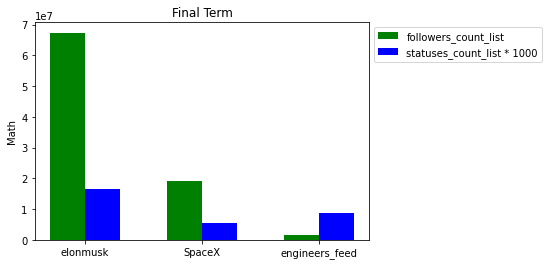

In [ ]:
# The values in followers_count_list and statuses_count_list are so different that the values in statuses_count_list are multiplied by 1000 to enhance the contrast.
multiplied_list = [element * 1000 for element in statuses_count_list]

name = ["elonmusk", "SpaceX", "engineers_feed"]
x = np.arange(len(name))
width = 0.3
plt.bar(x, followers_count_list, width, color='green', label='followers_count_list')
plt.bar(x + width, multiplied_list, width, color='blue', label='statuses_count_list * 1000')
plt.xticks(x + width / 2, name)
plt.ylabel('Math')
plt.title('Final Term')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

We can see the number of followers does not influence the number of tweets they post.

# 2 Task 2 – Network analysis

I use Elon Reeve Musk ' s twitter for example.

In [ ]:
# name_list == ['elonmusk', 'SpaceX', 'engineers_feed']
# name_list[0] = 'elonmusk'
# use "elonmusk" as the middle point.

ID = get_user_id(name_list[0]);ID

'44196397'

Elon Reeve Musk ' s twitter ID is "44196397"

A network consists of nodes  and edges.  
So we need to create a dataframe which contains 2 columns. One is the source and the other is the target.  

First, I want to get the followers of Musk.

In [ ]:
# store Musk' s ID in the list
user_list = [ID]

# create a list for store the followers of musk
follower_list = []


for user in user_list:
    followers = []
    
    # get the ID of Musk' s followers
    temp = api.get_follower_ids(user_id=user)

    for x in temp:
      # append the followers' ID into the list
      followers.append(x)
    
      #print(len(followers))
    
    follower_list.append(followers)

Since the data obtained contains users that do not exist, we filter out the users that really exist based on the id feature.

In [ ]:
# create a empty list to store the read users
real_follers_list = []

# judge the real users by the length of their ids
for x in follower_list[0]:
  if len(str(x))!=19 and len(str(x))!=18 and len(str(x))!=8:
    real_follers_list.append(x)


Now we get the followers and try to create a new dataframe which contain these information.

In [ ]:
# create a dataframe contains 2 columns
df = pd.DataFrame(columns=['source','target'])

# select 5 followers from the followers list.
df['target'] = real_follers_list[5:10]

# Filling Musk' s ID
df['source'] = ID

In [ ]:

df

,source,target
0,44196397,255388974
1,44196397,1275440886
2,44196397,1864894783
3,44196397,205395795
4,44196397,388370485


Now I decide to visualize this simple Network by using the NetworkX to convert the dataframe into a graph.

In [ ]:
G = nx.from_pandas_edgelist(df,'source','target')

pos = nx.spring_layout(G, seed=42)

Plot the graph.

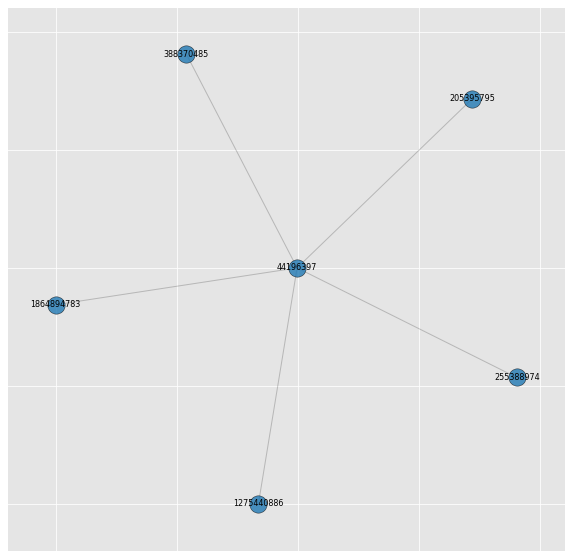

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G, pos, alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

Then, I want to get the followers of Musk' s followers to enriching the entire network.

In [ ]:
# Use the list to store the Followers of followers
user_list = list(df['target']) 
user_list

[255388974, 1275440886, 1864894783, 205395795, 388370485]

I write a Loop to get the Followers of followers, and append the information to the original dataframe, then write to a new csv file for reading later.

In [ ]:
user_list

[255388974, 1275440886, 1864894783, 205395795, 388370485]

In [ ]:
for userID in user_list:

    # print Musk' s followers' ID
    print(userID)

    # create 2 empty list to store the ID
    followers = []
    follower_list = []

    # return 5 Followers of followers
    temp = api.get_follower_ids(user_id=userID,count=5)

    # write the ID into list
    for x in temp:
      followers.append(x)

    follower_list.append(followers)

    # create a empty dataframe for append to the original dataframe
    temp1 = pd.DataFrame(columns=['source', 'target'])
    temp1['target'] = follower_list[0]
    temp1['source'] = userID
    df = df.append(temp1)

    # python write mode "w"
    df.to_csv("networkOfFollowers.csv")

255388974
1275440886
1864894783
205395795
388370485


Now read the csv file and turn the dataframe into the graph.

In [ ]:
df = pd.read_csv('/content/networkOfFollowers.csv')
G = nx.from_pandas_edgelist(df,source='source',target='target')

In [ ]:
# Find the total number of nodes in this graph
G.number_of_nodes()

30

There are 19 nodes in this Network.

In [ ]:
G_sorted = pd.DataFrame(sorted(G.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['nconst','degree']
G_sorted

,nconst,degree
0,255388974,6
1,1275440886,6
2,1864894783,6
3,205395795,6
4,44196397,5
5,388370485,5
6,2260481930,1
7,1466028681726472202,1
8,1465233834803228676,1
9,1432042097306124292,1


In [ ]:
# use G_tmp to operate the rest of the operation.
G_tmp = G

I can easily do some network analytics.   
I split the graph into groups using community detection algorithm.

In [ ]:
# Compute the partition of the graph nodes which maximises the modularity using the Louvain heuristices.
partition = community_louvain.best_partition(G_tmp)

# Turn partition into dataframe
partition1 = pd.DataFrame([partition]).T
partition1 = partition1.reset_index()
partition1.columns = ['names','group']

In [ ]:
G_sorted = pd.DataFrame(sorted(G_tmp.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['names','degree']
G_sorted.head()
dc = G_sorted

Now I have the nodes grouped and the degree of each node, then combine these into a dataframe.

In [ ]:
combined = pd.merge(dc, partition1, how='left', left_on="names", right_on="names")

My dataframe looks like this:

In [ ]:
combined.head()

,names,degree,group
0,255388974,6,1
1,1275440886,6,2
2,1864894783,6,3
3,205395795,6,4
4,44196397,5,0


Now visualize this graph.

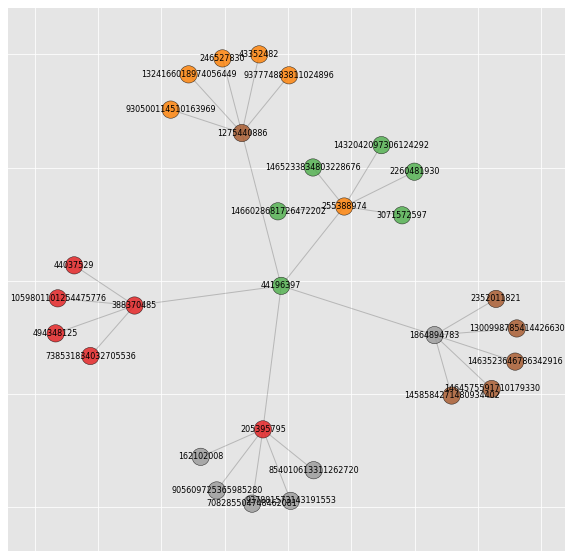

In [ ]:
pos = nx.spring_layout(G_tmp)
fig, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')


nodes = nx.draw_networkx_nodes(G_tmp, pos, cmap=plt.cm.Set1, node_color=combined['group'], alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G_tmp, pos, font_size=8)
nx.draw_networkx_edges(G_tmp, pos, width=1.0, alpha=0.2)
plt.savefig('FollowerOfFollower.png')

##<font size="5" >**2.1 Degree Distribution**</font>

Two standard techniques are used to visualise the degree distribution of nodes: the degree hierarchy graph and the degree histogram.

The degree of each node is determined, and a graph is generated showing three things: 

1.   The subgraph of connected components
2.   The degree-rank plot for the Graph
3.   The degree histogram



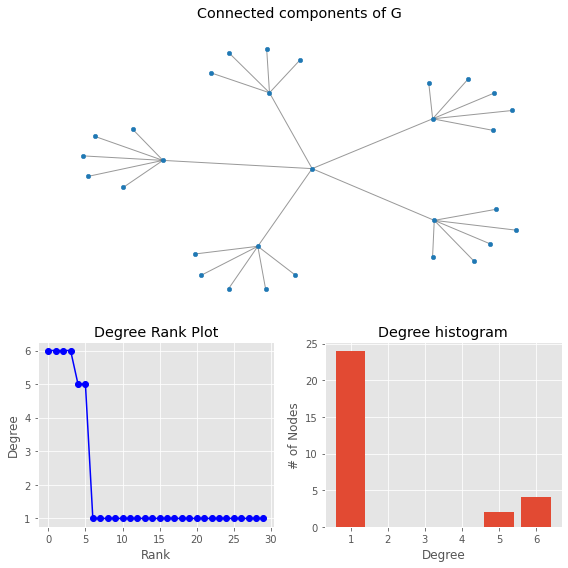

In [ ]:
##  Code Reference: https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html

degree_sequence = sorted([d for n, d in G_tmp.degree()], reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of twitter followers graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G_tmp), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=42)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

According to the graph, we can get the degree of nodes. we can know the number of edges associated with a node, knows each of the users relevance.

##<font size="5" >**2.2 Cluster coefficient**</font>

Compute the clustering coefficient for nodes.

In [ ]:
print(nx.clustering(G_tmp))

{44196397: 0, 255388974: 0, 1275440886: 0, 1864894783: 0, 205395795: 0, 388370485: 0, 2260481930: 0, 1466028681726472202: 0, 1465233834803228676: 0, 1432042097306124292: 0, 3071572597: 0, 1324166018974056449: 0, 43352482: 0, 937774883811024896: 0, 930500114510163969: 0, 246527830: 0, 1300998785414426630: 0, 1464575591710179330: 0, 1463523646786342916: 0, 2352011821: 0, 1458584271480934402: 0, 854010613311262720: 0, 937881573143191553: 0, 905609725365985280: 0, 162102008: 0, 708285504748462081: 0, 44037529: 0, 1059801101254475776: 0, 494348125: 0, 738531834032705536: 0}


Compute the number of triangles.

In [ ]:
print(nx.triangles(G_tmp))

{44196397: 0, 255388974: 0, 1275440886: 0, 1864894783: 0, 205395795: 0, 388370485: 0, 2260481930: 0, 1466028681726472202: 0, 1465233834803228676: 0, 1432042097306124292: 0, 3071572597: 0, 1324166018974056449: 0, 43352482: 0, 937774883811024896: 0, 930500114510163969: 0, 246527830: 0, 1300998785414426630: 0, 1464575591710179330: 0, 1463523646786342916: 0, 2352011821: 0, 1458584271480934402: 0, 854010613311262720: 0, 937881573143191553: 0, 905609725365985280: 0, 162102008: 0, 708285504748462081: 0, 44037529: 0, 1059801101254475776: 0, 494348125: 0, 738531834032705536: 0}


According to these results, we know that this graph contains too less nodes, so it can not forming a triangle.

We could guess if we colloect 10000 information, we might find the ycluster coefficient of the whole graph.

##<font size="5" >**2.3 Betweenness Centrality**</font>

In [ ]:
nx.degree_centrality(G_tmp)

{43352482: 0.034482758620689655,
 44037529: 0.034482758620689655,
 44196397: 0.1724137931034483,
 162102008: 0.034482758620689655,
 205395795: 0.20689655172413793,
 246527830: 0.034482758620689655,
 255388974: 0.20689655172413793,
 388370485: 0.1724137931034483,
 494348125: 0.034482758620689655,
 1275440886: 0.20689655172413793,
 1864894783: 0.20689655172413793,
 2260481930: 0.034482758620689655,
 2352011821: 0.034482758620689655,
 3071572597: 0.034482758620689655,
 708285504748462081: 0.034482758620689655,
 738531834032705536: 0.034482758620689655,
 854010613311262720: 0.034482758620689655,
 905609725365985280: 0.034482758620689655,
 930500114510163969: 0.034482758620689655,
 937774883811024896: 0.034482758620689655,
 937881573143191553: 0.034482758620689655,
 1059801101254475776: 0.034482758620689655,
 1300998785414426630: 0.034482758620689655,
 1324166018974056449: 0.034482758620689655,
 1432042097306124292: 0.034482758620689655,
 1458584271480934402: 0.034482758620689655,
 14635236

With Betweenness Centrality, we can learn that a node with higher betweenness centrality has more control in the network, as more information will pass through it when it is passed. We can use this coefficient to know which user has more control in the network.

##<font size="5" >**2.4 Assortativity**</font>

Compute degree assortativity of graph.

Assortativity measures the similarity of connections in the graph with respect to the node degree.

In [ ]:
r = nx.degree_assortativity_coefficient(G_tmp)
print(f"{r:3.1f}")

-0.8


Based on the results we obtained, it is clear that vertices with a large degree in general tend to connect vertices with a small degree.


##<font size="5" >**2.5 Conclusions**</font>

From this great section, we get the Twitter users information as we need and their followers' information. Using the NetworkX library, I plot the graph to show the bidirectional relationship of these people. I have learned the skill of using the Network and dataframe to analyse data from Twitter.